# K Nearest Neighbors Explore. 
En este proyecto, se buscará crear un predictor de la calidad de vinos, de acuerdo a sus características químicas y utilizando el modeo K Nearest Neighbors (KNN).

## Paso 1. Cargar la data. 
Se obtiene la data e información útil acerca del datafram.

In [1]:
import pandas as pd

df = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/k-nearest-neighbors-project-tutorial/refs/heads/main/winequality-red.csv", sep=";")
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [3]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


En este caso podemos visualizar que la base de datos, es una base de datos muy limpia, sin valores nulos.

Algo importante que se observo, es que hay algunos valores atípicos, de acuerdo al describe de la data, por lo que se visualizarán los datos en un breve EDA:

Nota:  
En el set de datos no hay una variable label, sin embargo, la variable que la representa, es la variable "quality" por lo que se sustituirá como sigue:

In [4]:
df.rename(columns={'quality': 'label'}, inplace=True)

In [5]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,label
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [6]:
df['label'].unique()

array([5, 6, 7, 4, 8, 3])

Ahora, dado que la columna label ahora tiene varios valores únicos, se agruparán los valores para que sean igual que la definición del problema:

In [7]:
# A los valores previos de quality, se les asígna un valor proporcional (entre 0, 1 y 2), de acuerdo a su calidad
df = df.replace({3: 0, 4: 0, 5:1, 6:1, 7:2, 8:2})
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,label
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,1


### Exploratory Data Analysis. 

#### Análisis univariable. 

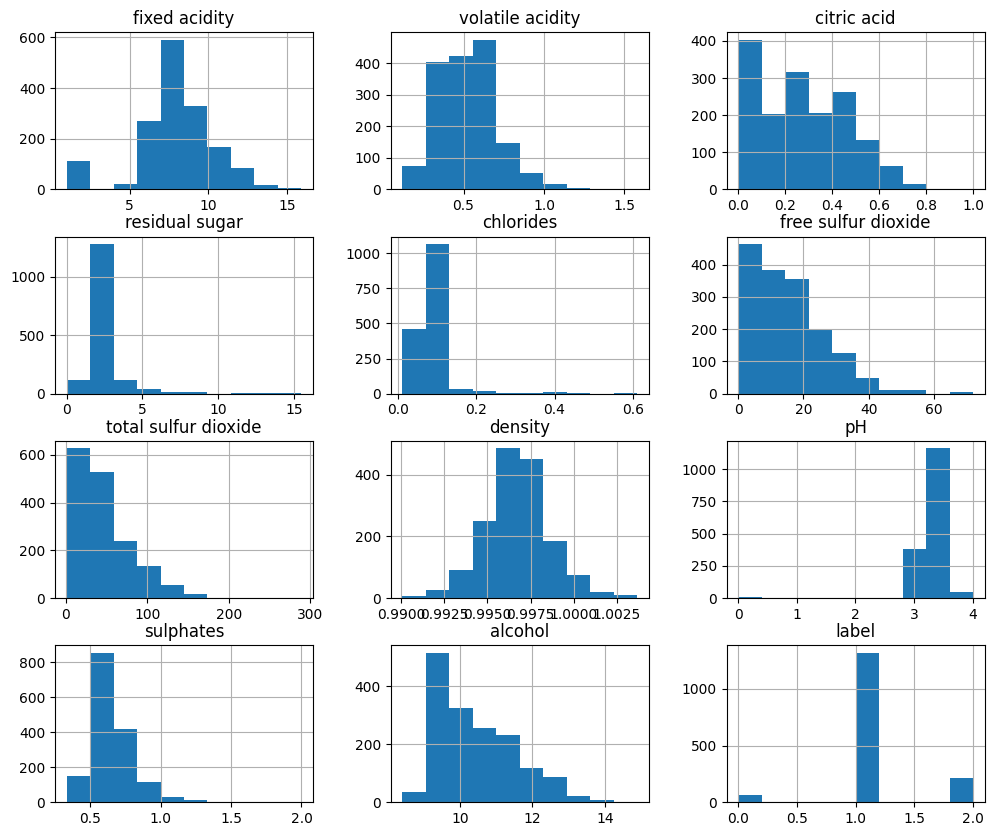

In [8]:
import matplotlib.pyplot as plt


df.hist(figsize=(12,10))
plt.show()

#### Análisis de outliers. 


<Axes: xlabel='residual sugar'>

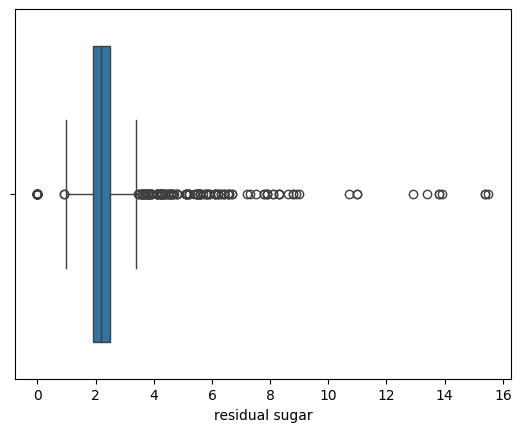

In [9]:
import seaborn as sns

sns.boxplot(x=df["residual sugar"])

<Axes: xlabel='chlorides'>

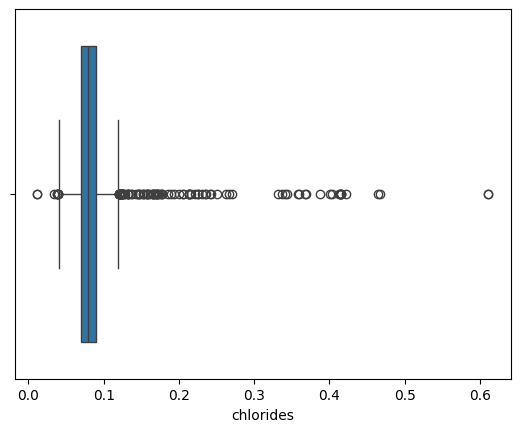

In [10]:
sns.boxplot(x=df["chlorides"])

<Axes: xlabel='free sulfur dioxide'>

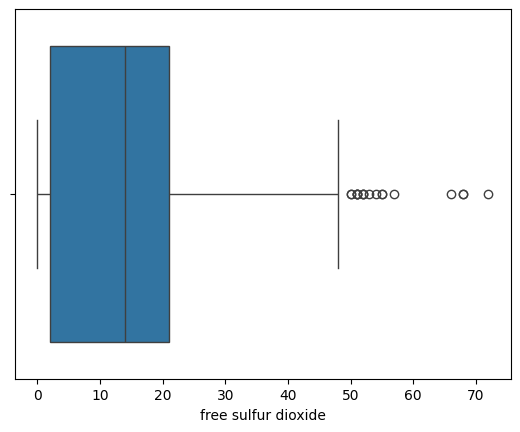

In [11]:
sns.boxplot(x=df["free sulfur dioxide"])

<Axes: xlabel='total sulfur dioxide'>

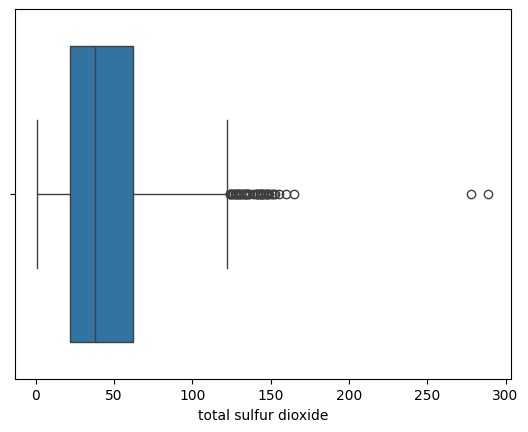

In [12]:
sns.boxplot(x=df["total sulfur dioxide"])

<Axes: xlabel='sulphates'>

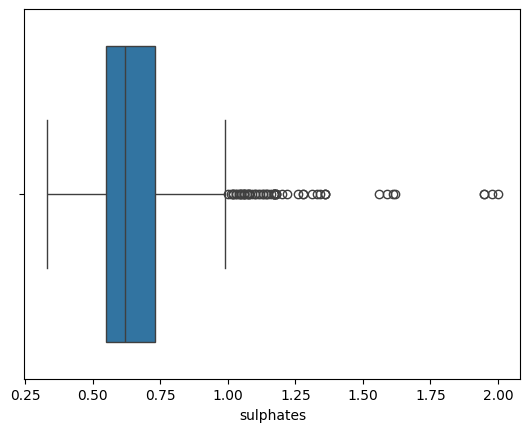

In [13]:
sns.boxplot(x=df["sulphates"])

Al observar boxplots, es posible identificar que algunas variables tienen una gran cantidad de valores atípicos, se verificará si es posible eliminar estos datos, que representan menos del 5% de los datos totales

In [14]:
# Calculo del 5% del total de los datos
five_percent = 1599 * 0.05
five_percent

79.95

In [15]:
data_rs = df['residual sugar']
data_c = df['chlorides']
data_fsd = df['free sulfur dioxide']
data_tsd = df['total sulfur dioxide']
data_sul = df['sulphates']

### Función para saber si es posible eliminar los valores atípicos.

In [16]:
## Paso 2.  
def find_outliers_IQR(dataf):
   q1=dataf.quantile(0.25)
   q3=dataf.quantile(0.75)
   IQR=q3-q1
   outliers = dataf[((dataf<(q1-1.5*IQR)) | (dataf>(q3+1.5*IQR)))]
   min_outlier = min(outliers)
   number_of_outlier = len(dataf[dataf > min_outlier])
   
   return number_of_outlier

total_outliers_p = find_outliers_IQR(data_rs)
total_outliers_mn= find_outliers_IQR(data_c)
total_outliers_nr= find_outliers_IQR(data_fsd)
total_outliers_rm= find_outliers_IQR(data_tsd)
total_outliers_chlc= find_outliers_IQR(data_sul)


def is_eliminated_outlier(all_outliers, variable):
   if all_outliers >= five_percent:
      print(f'❌ Con {all_outliers}, No es posible eliminar los outliers de {variable}, pues representan más del 5% de los datos.')
   elif all_outliers < five_percent:
      print(f'✅ Con {all_outliers}, Es posible eliminar los outliers de {variable}, pues representan menos del 5% de los datos.')

is_eliminated_outlier(total_outliers_p, "residual sugar")
is_eliminated_outlier(total_outliers_mn, "chlorides")
is_eliminated_outlier(total_outliers_nr, "free sulfur dioxide")
is_eliminated_outlier(total_outliers_rm, "total sulfur dioxide")
is_eliminated_outlier(total_outliers_chlc, "sulphates")

❌ Con 1563, No es posible eliminar los outliers de residual sugar, pues representan más del 5% de los datos.
❌ Con 1597, No es posible eliminar los outliers de chlorides, pues representan más del 5% de los datos.
✅ Con 16, Es posible eliminar los outliers de free sulfur dioxide, pues representan menos del 5% de los datos.
✅ Con 52, Es posible eliminar los outliers de total sulfur dioxide, pues representan menos del 5% de los datos.
✅ Con 58, Es posible eliminar los outliers de sulphates, pues representan menos del 5% de los datos.


Nota:  
De acuerdo a los resultados obtenidos, es posible identificar que de las variables residual sugar y chlorides, no se pueden eliminar los outliers, pues representan más del 5% de los datos. Del resto de las variables es posible, sin embargo, al ser poco los datos es interesante saber si esas características mejoran la calidad del vino, por lo que se mantendrán esos valores atípicos.

#### Análisis bivariado. 


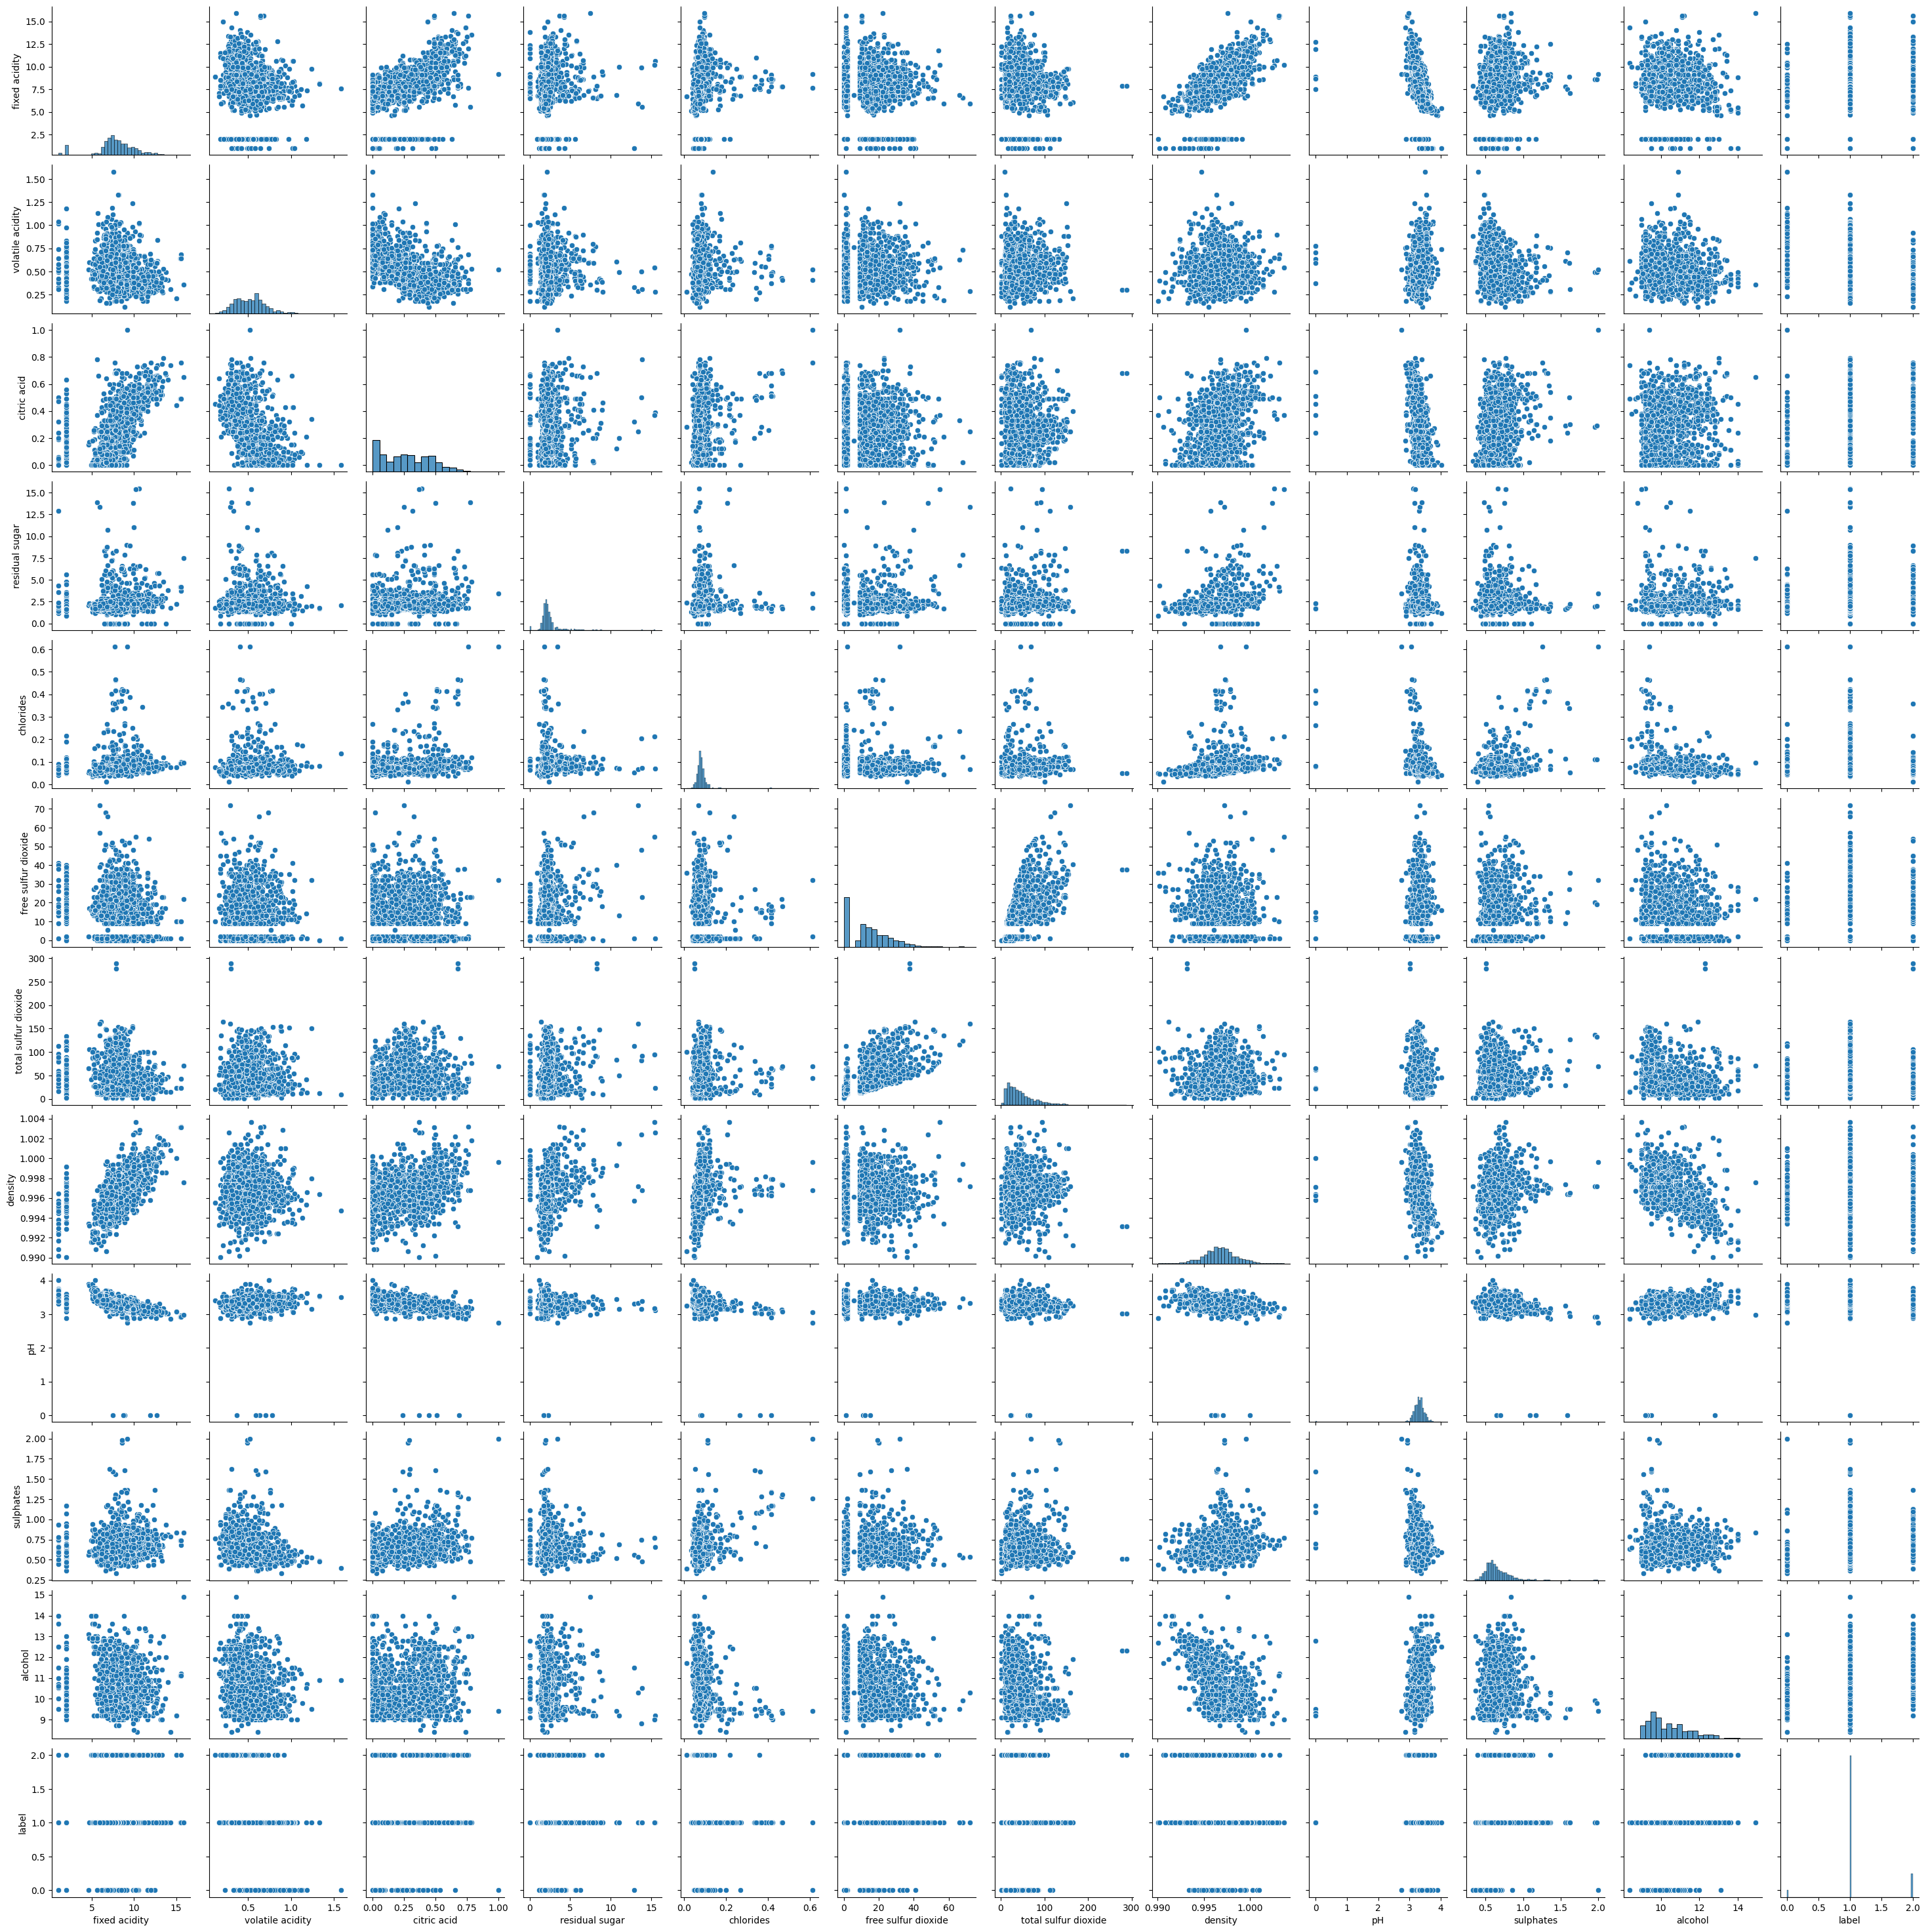

In [17]:
sns.pairplot(df)

Para buscar la posible correlación entre variables, se normalizarán los datos:

#### Correlaciones. 

In [18]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd

scaler = MinMaxScaler()
# Se separa la variable target, pues esta no debe normalizarse
label_data = df['label']
data = df.drop(columns=['label'])
# Normalización de la data
normalized_data = pd.DataFrame(scaler.fit_transform(data), columns=data.columns)
normalized_data['label'] = pd.Series(label_data)

In [19]:
normalized_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,label
0,0.429530,0.397260,0.00,0.122581,0.106845,0.152778,0.114583,0.567548,0.875312,0.137725,0.153846,1
1,0.456376,0.520548,0.00,0.167742,0.143573,0.347222,0.229167,0.494126,0.798005,0.209581,0.215385,1
2,0.456376,0.438356,0.04,0.148387,0.133556,0.208333,0.184028,0.508811,0.812968,0.191617,0.215385,1
3,0.684564,0.109589,0.56,0.122581,0.105175,0.236111,0.204861,0.582232,0.788030,0.149701,0.215385,1
4,0.429530,0.397260,0.00,0.122581,0.106845,0.152778,0.114583,0.567548,0.875312,0.137725,0.153846,1


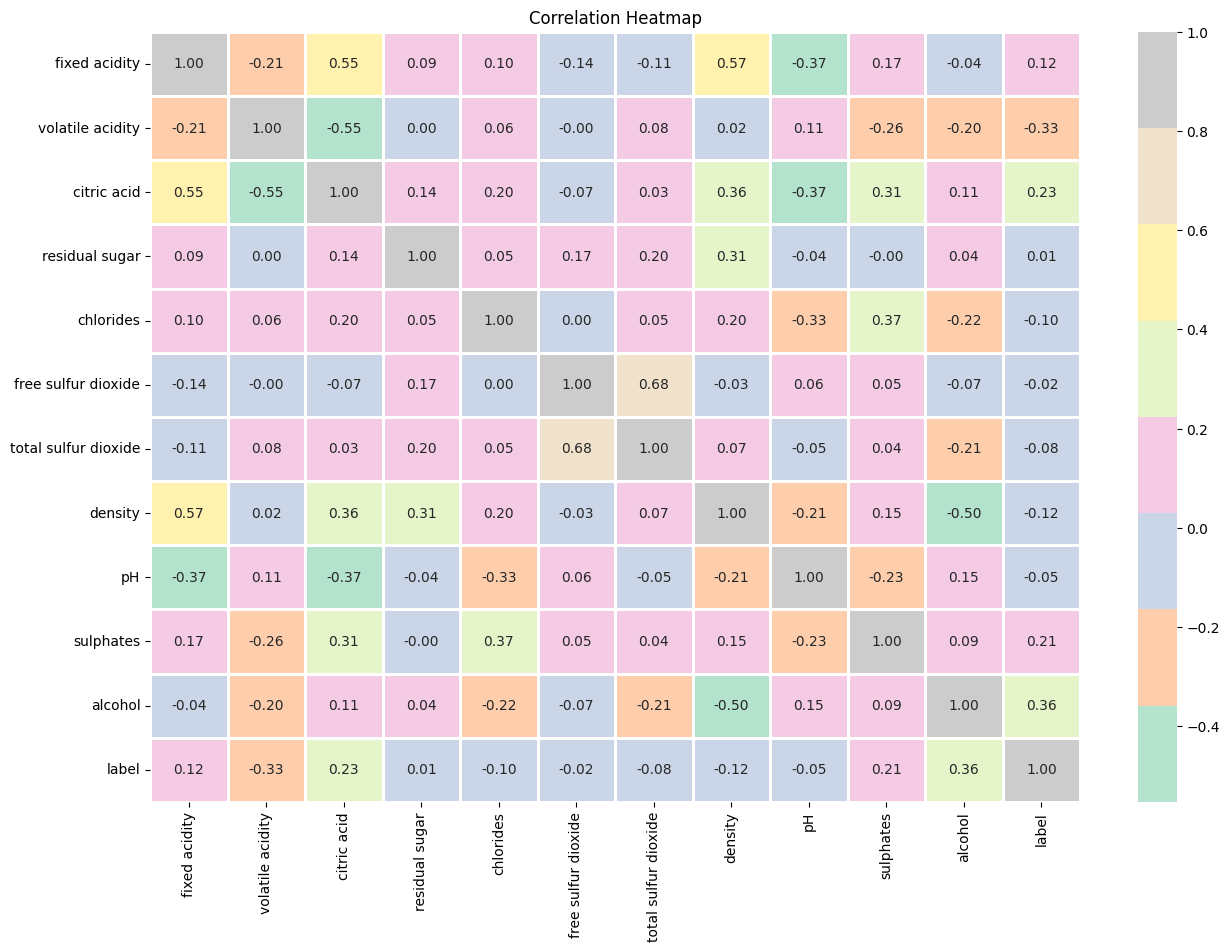

In [20]:
plt.figure(figsize=(15, 10))
sns.heatmap(normalized_data.corr(), annot=True, fmt='.2f', cmap='Pastel2', linewidths=2)

plt.title('Correlation Heatmap')
plt.show()

#### Observaciones. 
En la matriz de correlación anterior, se pueden observar variables con correlaciones débiles, sin embargo, es interesante.

Antes de realizar el entrenamiento, se generará un gráfico en 3D con el fin de visualizar la relación de las variables:

In [21]:
normalized_data["label"] = normalized_data["label"].map({0: "Baja calidad", 1: "Calidad media", 2: "Alta calidad"})

In [22]:
import plotly.express as px
 %reload_ext autoreload
%autoreload 2

fig = px.scatter_3d(normalized_data, x = "alcohol", y = "citric acid", z = "volatile acidity", color = "label", width = 1000, height = 500,
                    size = normalized_data["citric acid"].abs(), color_discrete_sequence=["#E58139", "#39E581", "#8139E5"])
camera = dict(
    up = dict(x = 1, y = 3.5, z = 0),
    eye = dict(x = 2, y = 0, z = 0)
)

fig.update_layout(scene_camera = camera)
fig.show()

## Paso 2. Entrenar Modelo KNN. 

Se divide el set de datos en train y test:

In [23]:
from sklearn.model_selection import train_test_split

X = normalized_data.drop("label", axis = 1)
y = normalized_data["label"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [24]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier()
model.fit(X_train, y_train)

,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [25]:
y_pred = model.predict(X_test)
y_pred

array(['Calidad media', 'Calidad media', 'Calidad media', 'Calidad media',
       'Calidad media', 'Calidad media', 'Calidad media', 'Calidad media',
       'Calidad media', 'Calidad media', 'Calidad media', 'Calidad media',
       'Calidad media', 'Calidad media', 'Calidad media', 'Alta calidad',
       'Calidad media', 'Calidad media', 'Calidad media', 'Calidad media',
       'Calidad media', 'Calidad media', 'Calidad media', 'Calidad media',
       'Calidad media', 'Calidad media', 'Calidad media', 'Calidad media',
       'Calidad media', 'Calidad media', 'Calidad media', 'Calidad media',
       'Calidad media', 'Calidad media', 'Calidad media', 'Calidad media',
       'Alta calidad', 'Calidad media', 'Calidad media', 'Calidad media',
       'Calidad media', 'Calidad media', 'Calidad media', 'Calidad media',
       'Calidad media', 'Calidad media', 'Alta calidad', 'Calidad media',
       'Calidad media', 'Calidad media', 'Calidad media', 'Calidad media',
       'Calidad media', 'Alt

In [26]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)

0.846875

### Matriz de Confusión. 

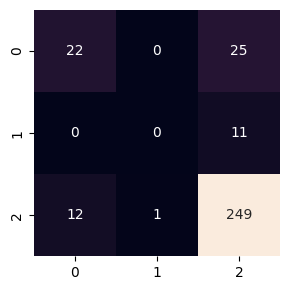

In [27]:
from sklearn.metrics import confusion_matrix

wines_cm = confusion_matrix(y_test, y_pred)

# Dibujaremos esta matriz para hacerla más visual
cm_df = pd.DataFrame(wines_cm)

plt.figure(figsize = (3, 3))
sns.heatmap(cm_df, annot=True, fmt="d", cbar=False)

plt.tight_layout()

plt.show()

### Reporte de Clasificación. 

In [28]:
# Reporte de clasificación
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

               precision    recall  f1-score   support

 Alta calidad       0.65      0.47      0.54        47
 Baja calidad       0.00      0.00      0.00        11
Calidad media       0.87      0.95      0.91       262

     accuracy                           0.85       320
    macro avg       0.51      0.47      0.48       320
 weighted avg       0.81      0.85      0.83       320

